In [148]:
# math 
import numpy as np

# dataframes
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn

# linear regression two ways
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.datasets import load_boston
from sklearn.linear_model import LassoCV

# for choosing covariates to include in model
from patsy import dmatrices 

# Linear regression in sklearn

In [149]:
# load data 
usage = pd.read_csv('elec_usage.txt')
Y, X = dmatrices('usage ~ temperature', data=usage, return_type='dataframe')

In [46]:
lm = LinearRegression()
model = lm.fit(X,Y)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
Yhat = lm.predict(X)
Yhat[:5]

array([[17.09934468],
       [25.28703023],
       [38.93317281],
       [58.03777243],
       [81.23621483]])

In [48]:
# how well does the model fit? 
lm.score(X,Y) # R^2 score

0.7804717931801871

In [49]:
# what about the coefficients?
lm.coef_

array([[ 0.        , -1.36461426]])

In [50]:
# and the intercept β_0
lm.intercept_

array([116.71618555])

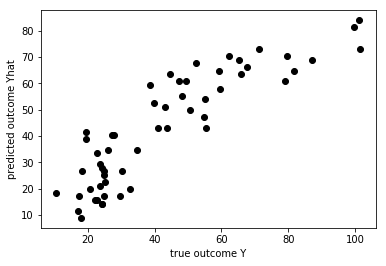

In [150]:
# and visualize the fit 
plt.scatter(Y, Yhat,  color='black')
plt.xlabel("true outcome Y")
plt.ylabel("predicted outcome Yhat")
plt.show()

# Logistic regression in sklearn

In [151]:
diabetes = pd.read_csv('diabetes.csv')
y = diabetes['Outcome']
features = diabetes.columns[:-1]
X = diabetes[features]

In [152]:
model = LogisticRegression().fit(X,y)
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [153]:
model.score(X,y)

0.7760416666666666

# Model selection in sklearn

In [134]:
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
X = boston.values
y = boston_dataset.target
variables = boston.columns
np.random.seed(1)

In [135]:
# step 1: hold out test set
# (generally around 20% of full data set)
X, X_holdout, y, y_holdout = train_test_split(X, y, test_size=0.2, random_state=1)
print("Training set: ", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Training set:  (404, 13) (404,)
Test set: (102, 13) (102,)


In [136]:
# step 2: select model parameters using cross-validation
# for example, what should the threshold be for LassoCV?

# We use the base estimator LassoCV since the L1 norm promotes sparsity of features.
clf = LassoCV()

# Set a minimum threshold of .5 (controls number of features selected)
sfm = SelectFromModel(clf, threshold=0)
sfm.fit(X, y)
selected_features = variables[sfm.get_support()]
selected_features

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [137]:
for train_indices, test_indices in k_fold.split(X):
    print('Train: %s | test: %s' % (train_indices, test_indices))

Train: [ 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188
 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206
 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224
 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242
 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260
 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278
 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296
 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314
 315 316 317 318 319 320 321 322 323 324 325

In [138]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.feature_selection import SelectFromModel
from collections import defaultdict

k_fold = KFold(n_splits=5)

scores = defaultdict()
for threshold in np.linspace(0, 1, 20):

    scores_t = []
    for train_indices, test_indices in k_fold.split(X):
        Xtrain = X[train_indices,:]
        Xtest = X[test_indices,:]
        ytrain = y[train_indices]
        ytest = y[test_indices]
        
        # select features up to threshold 
        sfm = SelectFromModel(clf, threshold=threshold)
        features = sfm.fit(Xtrain, ytrain).get_support()
        if sum(features)>0:
            Xftrain = Xtrain[:,features]
            Xftest = Xtest[:,features]

            # fit resulting model 
            model = LinearRegression().fit(Xftrain, ytrain)

            # score it on test set
            scores_t.append(model.score(Xftest, ytest))
        else:
            print("found no features for threshold", threshold)
            scores_t.append(0)
            
    scores[threshold] = np.mean(scores_t)

scores

found no features for threshold 0.9473684210526315
found no features for threshold 1.0
found no features for threshold 1.0


defaultdict(None,
            {0.0: 0.7024093528209905,
             0.05263157894736842: 0.6667316271004022,
             0.10526315789473684: 0.6605356311309276,
             0.15789473684210525: 0.6605356311309276,
             0.21052631578947367: 0.6605356311309276,
             0.2631578947368421: 0.6605036162879931,
             0.3157894736842105: 0.6625438950240808,
             0.3684210526315789: 0.6625438950240808,
             0.42105263157894735: 0.6625438950240808,
             0.47368421052631576: 0.6625438950240808,
             0.5263157894736842: 0.6625438950240808,
             0.5789473684210527: 0.6625438950240808,
             0.631578947368421: 0.6625438950240808,
             0.6842105263157894: 0.6036597627508204,
             0.7368421052631579: 0.5096958539775891,
             0.7894736842105263: 0.4875771631176525,
             0.8421052631578947: 0.46136874849003684,
             0.894736842105263: 0.43676620165151875,
             0.9473684210526315: 0.34

Text(0, 0.5, 'score')

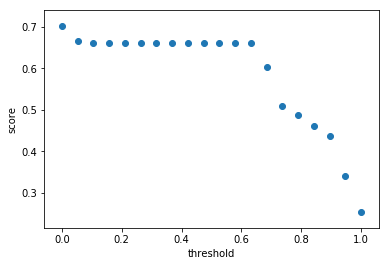

In [139]:
thresholds = scores.keys()
scoreslist = [scores[t] for t in thresholds]
plt.scatter(thresholds, scoreslist)
plt.xlabel("threshold")
plt.ylabel("score")

ok, looks like the highest threshold resulting in a good model is around .6. (This also shows that a threshold of 0 - selecting all the given features - does quite well without overfitting. Still, we might choose a higher threshold in order to get a simpler model.) 

How well does the resulting model work on the test set?

In [147]:
# select features up to threshold, using training dataset 
sfm = SelectFromModel(clf, threshold=0)
features = sfm.fit(X, y).get_support()
print("Selected features: ", variables[features])

Xftrain = X[:,features]
Xftest = X_test[:,features]

# fit resulting model 
model = LinearRegression().fit(Xftrain, y)
print("Training score: ", model.score(Xftrain,y))

# score it on test set
print("Test score: ", model.score(Xftest, y_test))

Selected features:  Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')
Training score:  0.729293968941527
Test score:  0.7634809220792321


score of the resulting model on test set is a tad higher than the training error.

* usually, you expect test error <= training error 
* here, it's higher due to random chance

# Classifier comparison

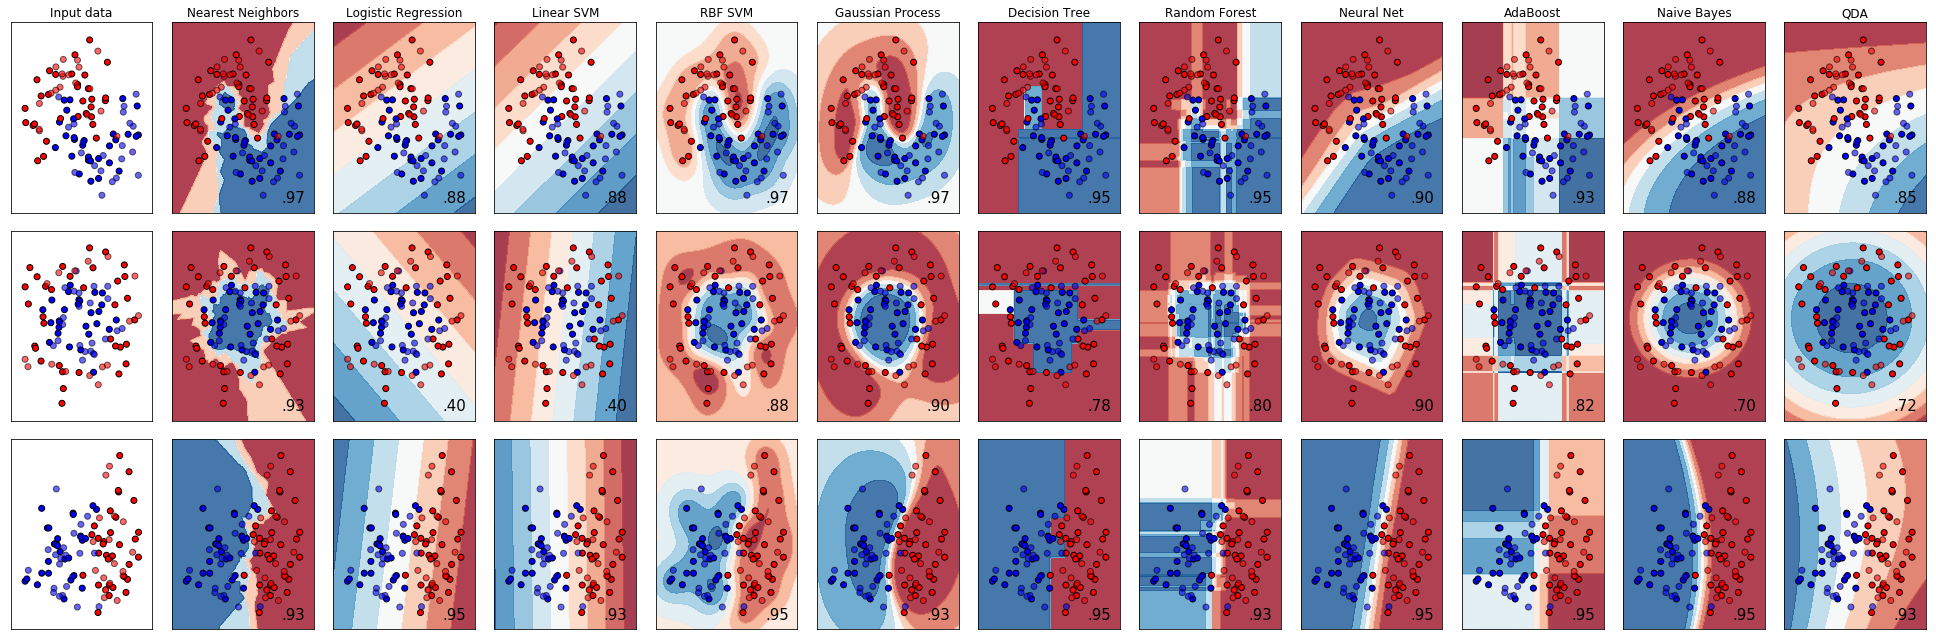

In [154]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Logistic Regression", "Linear SVM", "RBF SVM", 
         "Gaussian Process", "Decision Tree", "Random Forest", "Neural Net", 
         "AdaBoost", "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    LogisticRegression(),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()